In [1]:
import pandas as pd #This line imports the Pandas library
import numpy as np
import matplotlib.pyplot as plt #This imports Matplotlib's pyplot module
import seaborn as sns #This imports the Seaborn library
import plotly.express as px 
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('Allergen_Status_Of_Food_Products.csv')
#Read data from the csv file and loads it into DataFrame

In [3]:
df.head()
#This function return the first 5 rows of the DataFrame by default.I can also specify the number of rows to view by providing a number as an argument

Food Product Main Ingredient Sweetener Fat/Oil Seasoning  \
0       Almond Cookies         Almonds     Sugar  Butter     Flour   
1       Almond Cookies         Almonds     Sugar  Butter     Flour   
2  Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt   
3  Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt   
4       Cheddar Cheese          Cheese       NaN     NaN      Salt   

                Allergens  Price ($)  Customer rating (Out of 5) Prediction  
0   Almonds, Wheat, Dairy      10.15                         3.1   Contains  
1   Almonds, Wheat, Dairy       6.17                         4.5   Contains  
2  Chicken, Wheat, Celery      19.65                         4.1   Contains  
3  Chicken, Wheat, Celery      17.48                         4.7   Contains  
4                   Dairy      10.83                         3.7   Contains

In [4]:
df.shape
#This attribute return rows and column of the DataFrame

(399, 9)

In [5]:
df.isnull().sum()
#This function shows how many missing values are in each column,it's usufull for data cleaning.
#For example 'Prediction' has 0 missing value

Food Product                    0
Main Ingredient                 0
Sweetener                     280
Fat/Oil                        58
Seasoning                      20
Allergens                     148
Price ($)                       0
Customer rating (Out of 5)      0
Prediction                      1
dtype: int64

In [6]:
df['Prediction'].unique()
# This functiom returns an array of the unique values found in specific column.In this case, 'Prediction' column contains three unique categories,it 
# return array(['Contains', 'Does not contain', nan], dtype=object)

array(['Contains', 'Does not contain', nan], dtype=object)

In [7]:
df['Allergens'].value_counts()
#This function counts the occurrences of each unique value in the specified column and return a series with the counts,sorted in descending order bu default
#For this case,'Dairy' appear 120 times,'Fish' 7 times,and so on, in the 'Allergens' column.

Allergens
Dairy                     83
Wheat, Dairy              72
Wheat                      8
Soybeans                   8
Fish                       7
Fish, Soybeans             6
Shellfish, Dairy           6
Shellfish                  6
Peanuts                    5
Milk                       4
Eggs                       3
Pine nuts, Dairy           3
Wheat, Dairy, Nuts         3
Dairy, Wheat               3
Shellfish, Eggs            2
Chicken, Wheat, Celery     2
Wheat, Dairy, Cocoa        2
Wheat, Dairy, Eggs         2
Milk, Strawberries         2
Almonds, Wheat, Dairy      2
Fish, Eggs                 2
Dairy, Nuts                2
Fish, Dairy                2
Dairy, Anchovies           1
Dairy, Cocoa               1
Dairy, Eggs                1
Wheat, Dairy, Alcohol      1
Dairy, Fish                1
Dairy, Ghee                1
Soybeans, Fish             1
Shellfish, Soybeans        1
Oats, Dairy                1
Shellfish, Pork            1
Eggs, Dairy                1
Eggs

In [8]:
df.describe()
#This function generate a summary of descriptive statistics for the numerical columns in the DataFrame.

Price ($)  Customer rating (Out of 5)
count  399.000000                  399.000000
mean    12.402356                    2.991228
std      4.368315                    1.171049
min      5.070000                    1.000000
25%      8.650000                    1.900000
50%     12.470000                    3.100000
75%     16.105000                    4.000000
max     19.930000                    5.000000

<Axes: >

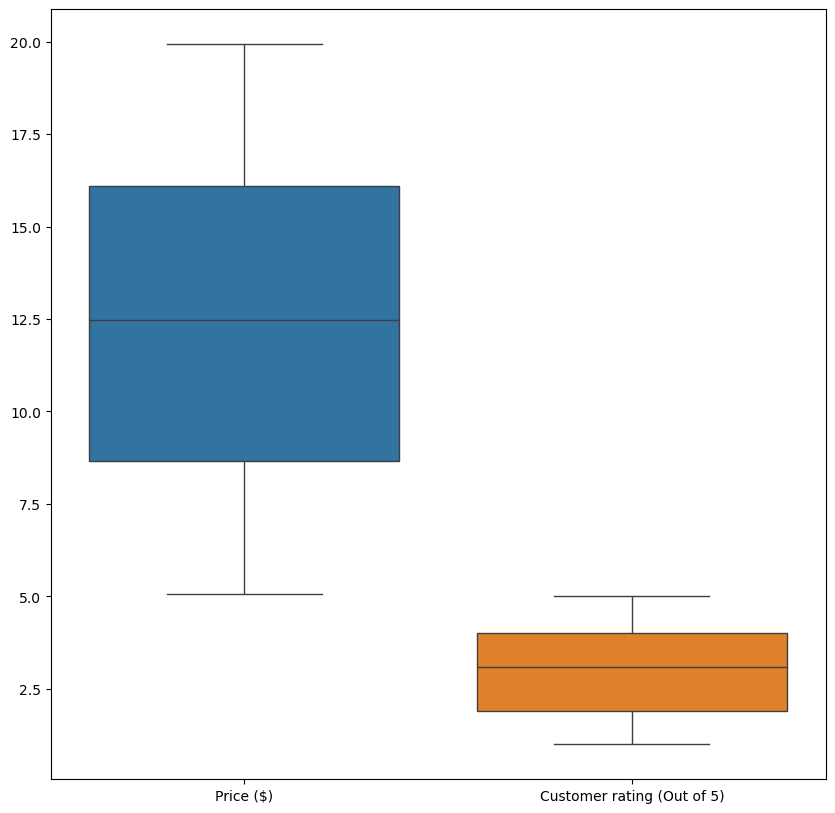

In [9]:
fig, ax=plt.subplots(figsize=(10,10))
# This line initializes a Matplotlib figure (fig) and an axes object (ax) to plot on.
# figsize=(20, 20) sets the dimensions of the plot to 20 by 20 inches
sns.boxplot(data=df,ax=ax)
# This creates a box plot for each numerical column in the DataFrame (df), using Seaborn’s boxplot function.
# data=df specifies that the data to be plotted is from the DataFrame df.
# ax=ax specifies that the plot should be drawn on the previously created ax object, which uses the 20x20 figure size.

# This visualization helps you identify the spread and any outliers for each numerical feature in your dataset 

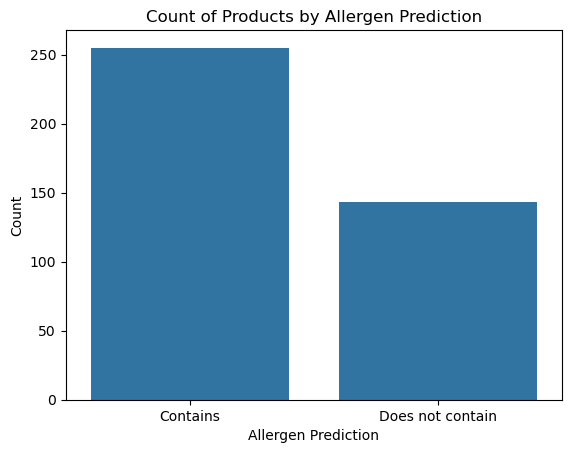

In [10]:
# Count of Products by Allergen Prediction
sns.countplot(x='Prediction', data=df)
plt.title('Count of Products by Allergen Prediction')
plt.xlabel('Allergen Prediction')
plt.ylabel('Count')
plt.show()

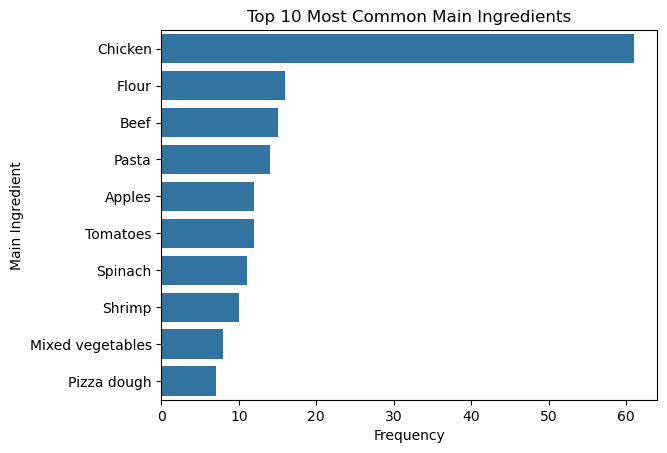

In [11]:
# Top 10 Most Common Main Ingredients
top_ingredients = df['Main Ingredient'].value_counts().head(10)
sns.barplot(x=top_ingredients.values, y=top_ingredients.index)
plt.title('Top 10 Most Common Main Ingredients')
plt.xlabel('Frequency')
plt.ylabel('Main Ingredient')
plt.show()

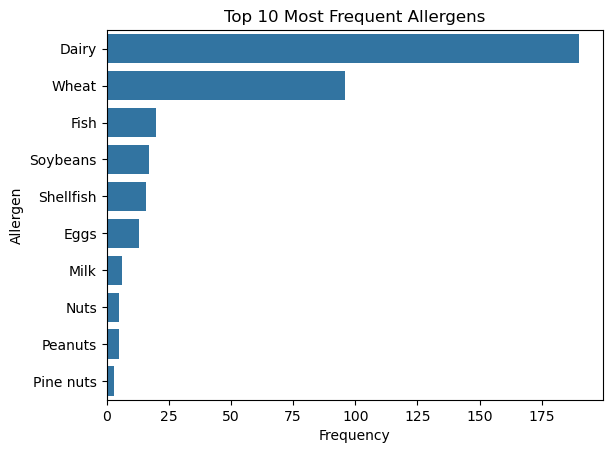

In [12]:
# Split allergens into separate items and count occurrences
allergen_series = df['Allergens'].str.split(', ').explode()
top_allergens = allergen_series.value_counts().head(10)

# Top 10 Most Frequent Allergens
sns.barplot(x=top_allergens.values, y=top_allergens.index)
plt.title('Top 10 Most Frequent Allergens')
plt.xlabel('Frequency')
plt.ylabel('Allergen')
plt.show()

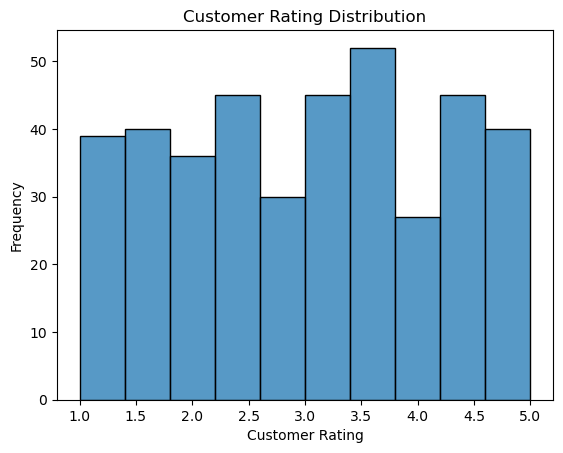

In [13]:
# Plot the Customer Rating Distribution with the correct column name
sns.histplot(df['Customer rating (Out of 5)'], bins=10)
plt.title('Customer Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()

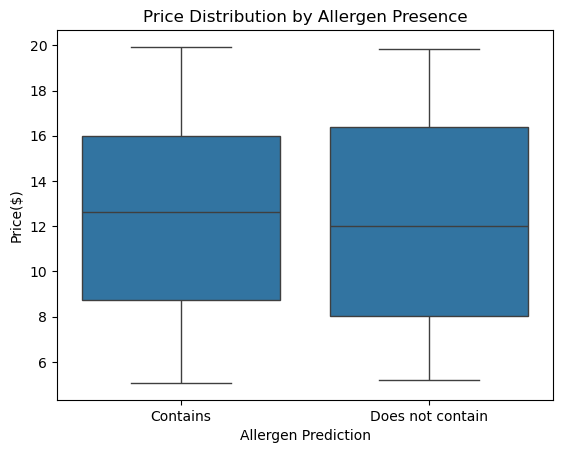

In [14]:
#Price Distribution by Allergen Presence
sns.boxplot(x='Prediction',y='Price ($)',data=df)
plt.title('Price Distribution by Allergen Presence')
plt.xlabel('Allergen Prediction')
plt.ylabel('Price($)')
plt.show()

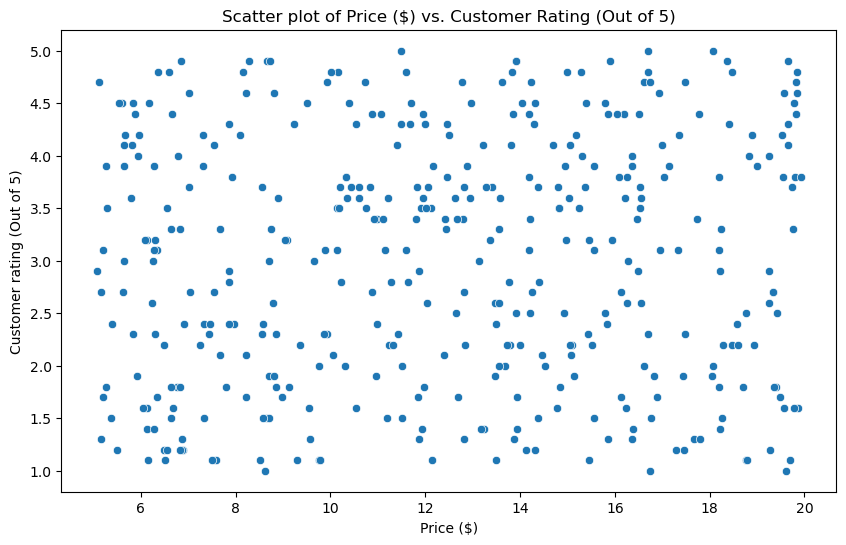

In [15]:
#Scatter plot of Price vs. Customer Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price ($)',y='Customer rating (Out of 5)',data=df)
plt.title('Scatter plot of Price ($) vs. Customer Rating (Out of 5)')
plt.xlabel('Price ($)')
plt.ylabel('Customer rating (Out of 5)')
plt.show()
           

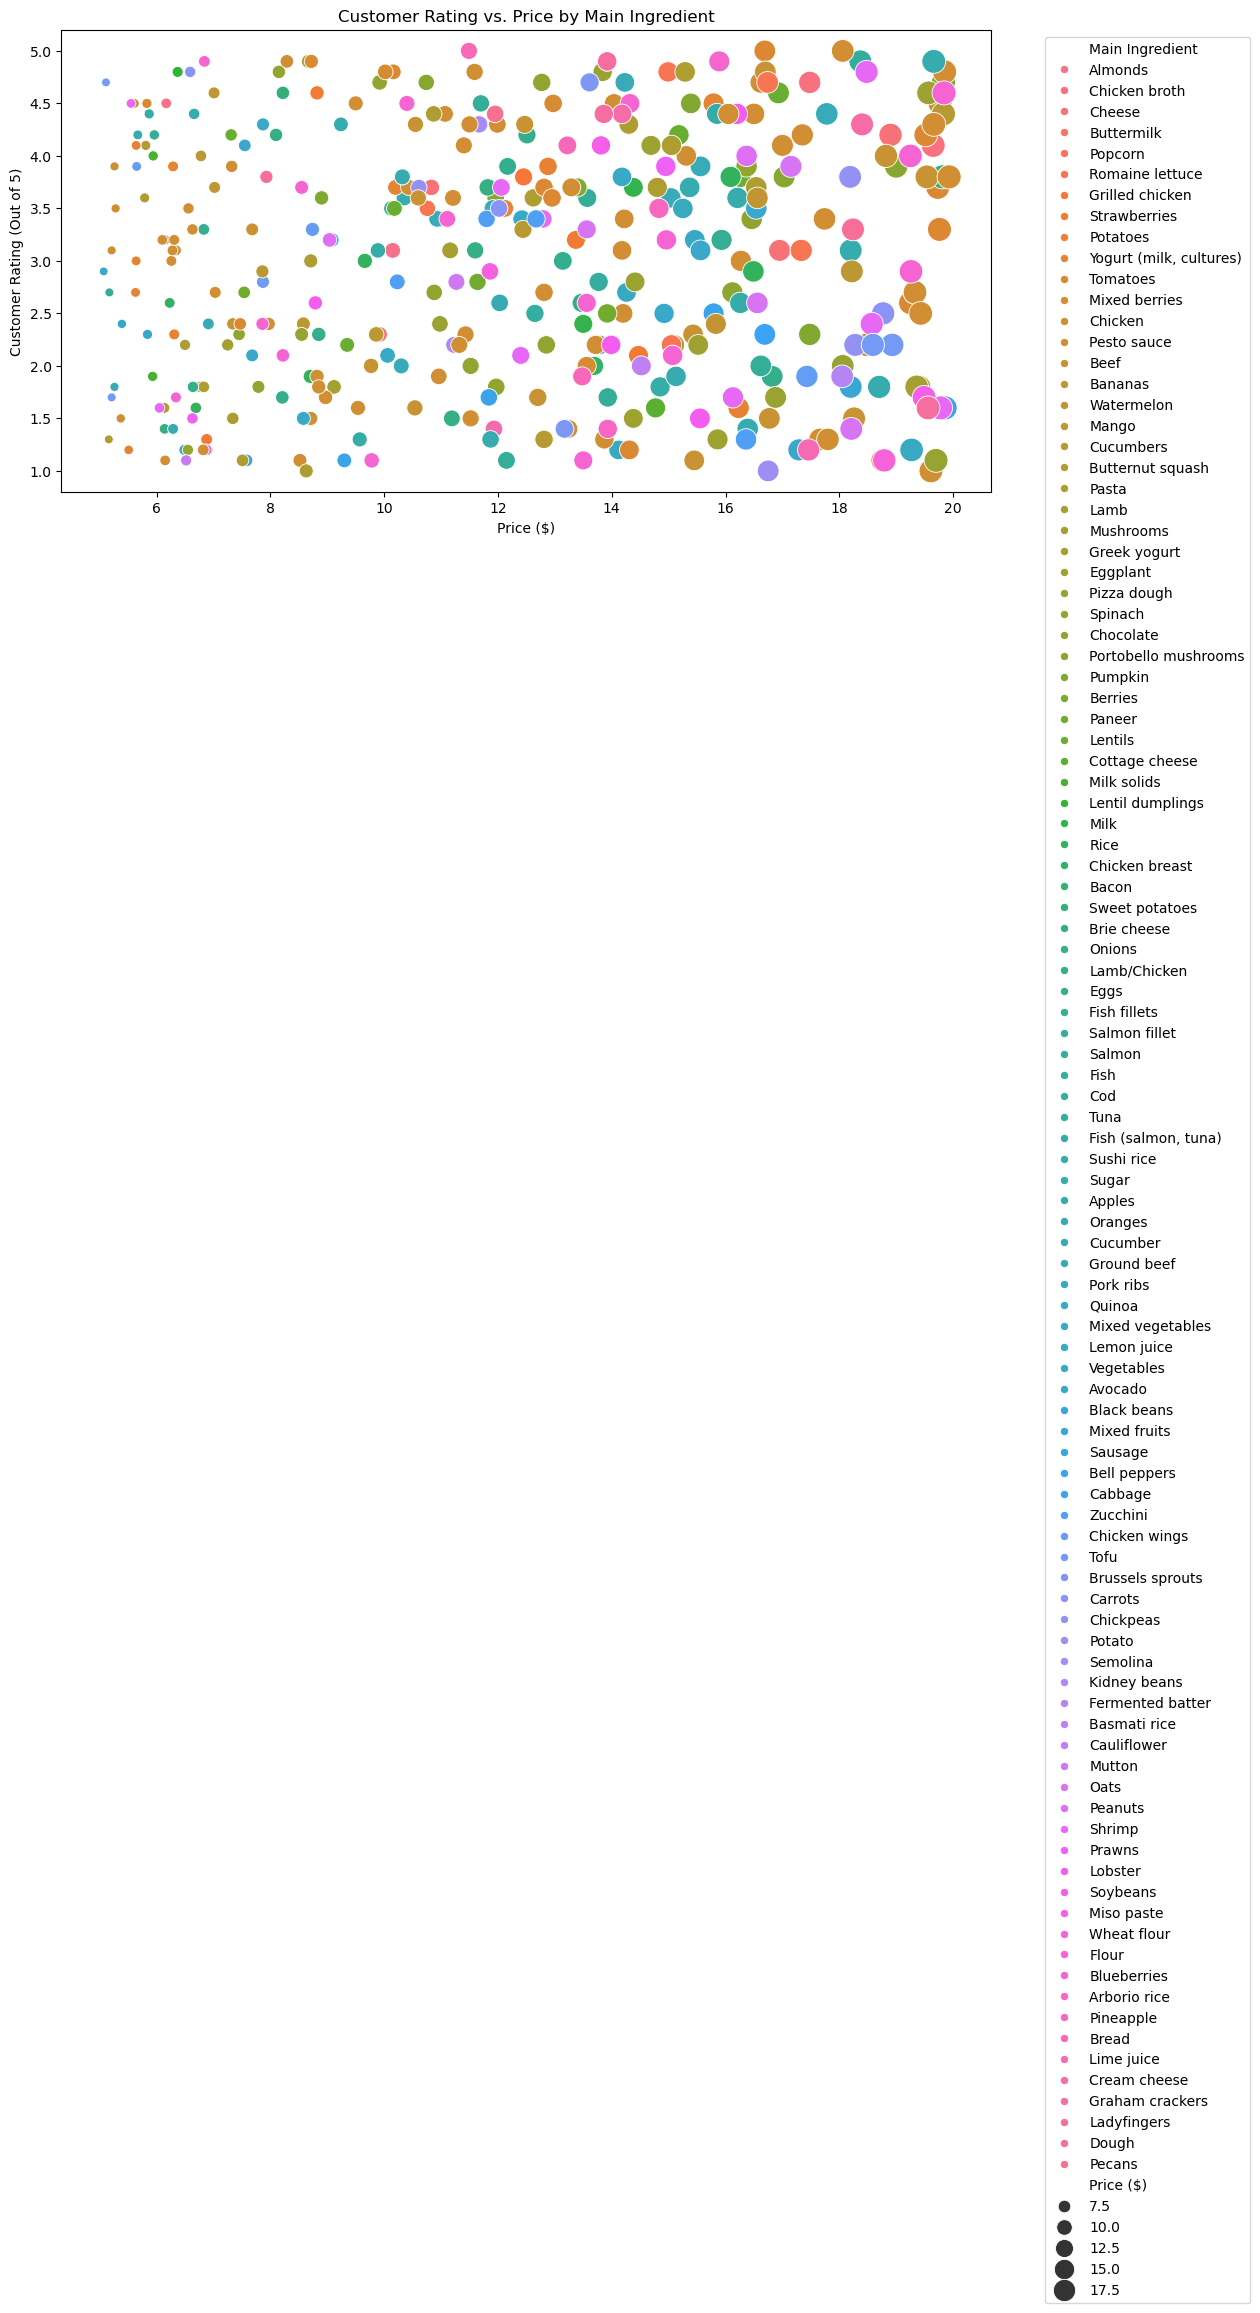

In [16]:
# Scatter Plot with Size/Color for Customer Rating vs. Price by Main Ingredient:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Price ($)', y='Customer rating (Out of 5)', hue='Main Ingredient', size='Price ($)', sizes=(40, 300))
plt.title('Customer Rating vs. Price by Main Ingredient')
plt.xlabel('Price ($)')
plt.ylabel('Customer Rating (Out of 5)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


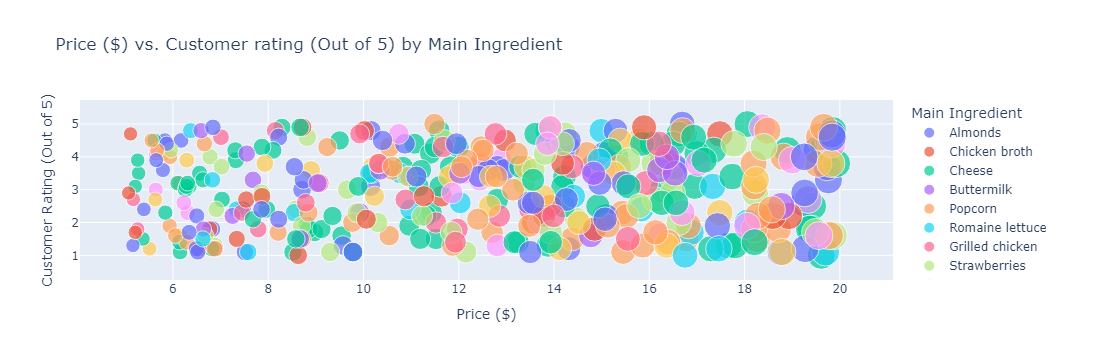

In [17]:
#Scatter Plot of Price vs. Customer Rating:
import plotly.express as px
fig = px.scatter(df, x='Price ($)', y='Customer rating (Out of 5)', color='Main Ingredient',
                 title='Price ($) vs. Customer rating (Out of 5) by Main Ingredient',
                 labels={'Price ($)': 'Price ($)', 'Customer rating (Out of 5)': 'Customer Rating (Out of 5)'},
                 size='Price ($)', hover_name='Main Ingredient')
fig.show()

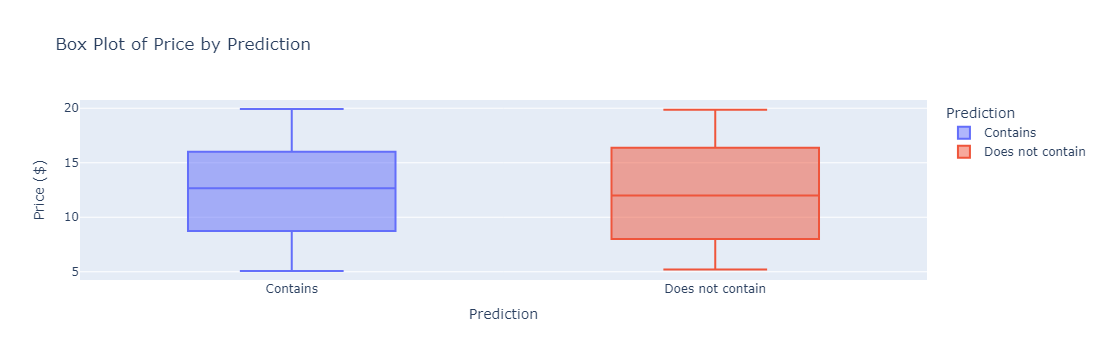

In [18]:
#Box Plot of Price by Prediction:
fig = px.box(df, x='Prediction', y='Price ($)', color='Prediction',
             title='Box Plot of Price by Prediction',
             labels={'Price ($)': 'Price ($)', 'Prediction': 'Prediction'})
fig.show()

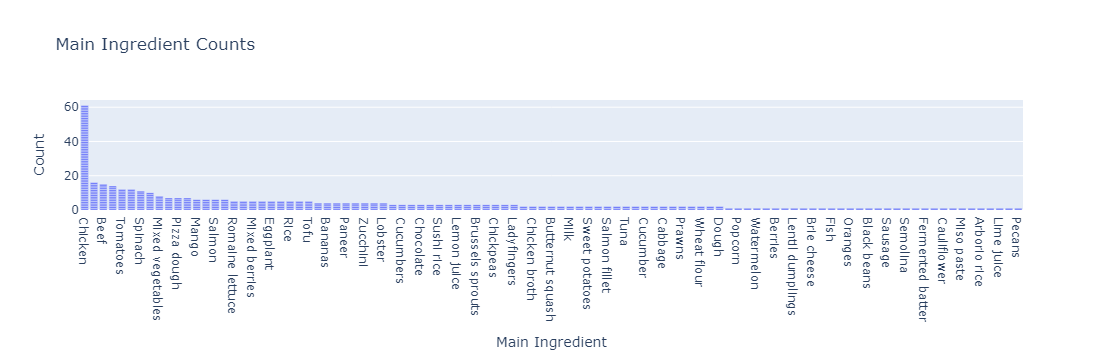

In [19]:
# Bar Plot of Main Ingredient Counts:
fig = px.bar(df, x='Main Ingredient', title='Main Ingredient Counts',
             labels={'Main Ingredient': 'Main Ingredient', 'count': 'Count'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


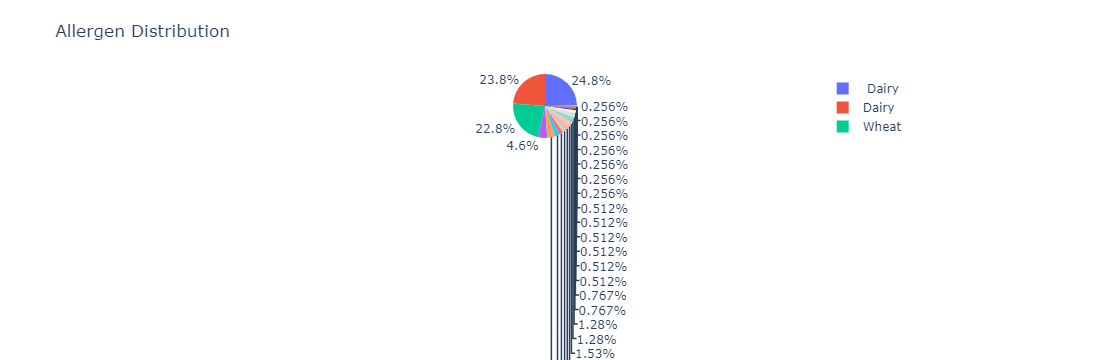

In [20]:
#Pie Chart of Allergen Distribution:
allergen_counts = df['Allergens'].str.split(',', expand=True).stack().value_counts().reset_index()
allergen_counts.columns = ['Allergen', 'Count']

fig = px.pie(allergen_counts, names='Allergen', values='Count', title='Allergen Distribution')
fig.show()

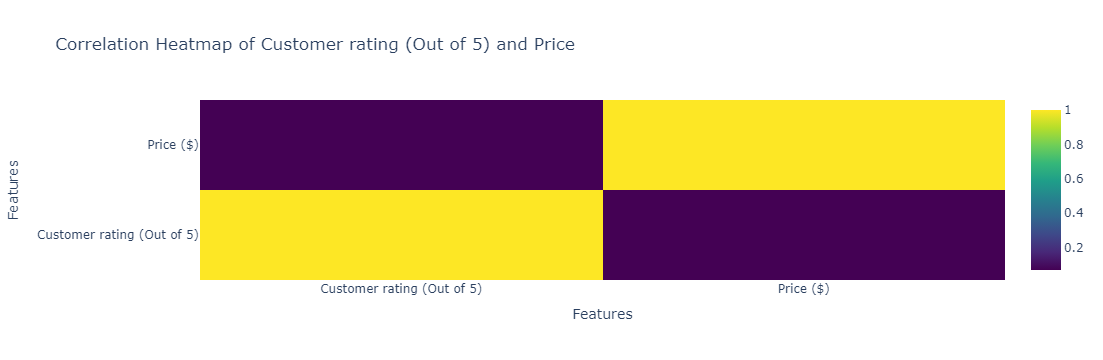

In [21]:
#Correlation Heatmap of Customer rating (Out of 5) and Price

numerical_cols = ['Customer rating (Out of 5)', 'Price ($)']

corr_matrix = df[numerical_cols].corr().to_numpy()

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix,
    x=numerical_cols,
    y=numerical_cols,
    colorscale='Viridis'
))
fig.update_layout(
    title='Correlation Heatmap of Customer rating (Out of 5) and Price',
    xaxis_title='Features',
    yaxis_title='Features'
)
fig.show()


In [22]:
df.columns

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Price ($)', 'Customer rating (Out of 5)', 'Prediction'],
      dtype='object')

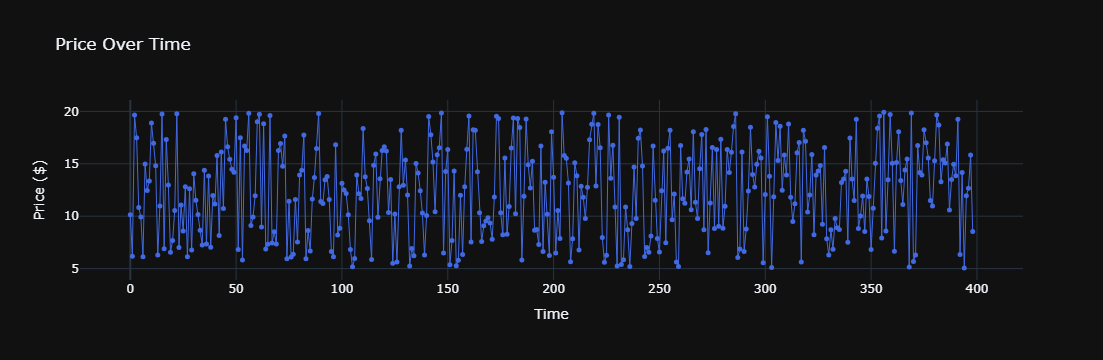

In [23]:
df['Time'] = range(len(df))  

fig = go.Figure()

# Add a line plot
fig.add_trace(go.Scatter(x=df['Time'], y=df['Price ($)'], mode='lines+markers', name='Price ($)',
                         line=dict(color='RoyalBlue', width=1), marker=dict(size=5)))

fig.update_layout(
    title='Price Over Time',
    xaxis_title='Time',
    yaxis_title='Price ($)',
    template='plotly_dark'
)

fig.show()

In [24]:
# Check for missing values

print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Food Product                    0
Main Ingredient                 0
Sweetener                     280
Fat/Oil                        58
Seasoning                      20
Allergens                     148
Price ($)                       0
Customer rating (Out of 5)      0
Prediction                      1
Time                            0
dtype: int64


In [25]:
### Handling Missing Values ###

# impute missing values with 'Unknown' for categorical columns

df['Sweetener'].fillna('Unknown', inplace=True)
df['Fat/Oil'].fillna('Unknown', inplace=True)
df['Seasoning'].fillna('Unknown', inplace=True)
df['Allergens'].fillna('Unknown', inplace=True)
df['Prediction'].fillna('Unknown', inplace=True)
# Check the DataFrame after imputing missing values
print("\nData After Imputing Missing Values:\n", df)


Data After Imputing Missing Values:
             Food Product Main Ingredient Sweetener  Fat/Oil       Seasoning  \
0         Almond Cookies         Almonds     Sugar   Butter           Flour   
1         Almond Cookies         Almonds     Sugar   Butter           Flour   
2    Chicken Noodle Soup   Chicken broth   Unknown  Unknown            Salt   
3    Chicken Noodle Soup   Chicken broth   Unknown  Unknown            Salt   
4         Cheddar Cheese          Cheese   Unknown  Unknown            Salt   
..                   ...             ...       ...      ...             ...   
394           Lemon Bars     Lemon juice     Sugar   Butter     Flour, eggs   
395            Pecan Pie          Pecans     Sugar   Butter      Corn syrup   
396       Zucchini Bread        Zucchini     Sugar   Butter  Cinnamon, nuts   
397         Banana Bread         Bananas     Sugar   Butter  Cinnamon, nuts   
398       Hawaiian Pizza     Pizza dough   Unknown  Unknown  Pineapple, ham   

             

C:\Users\ariji\AppData\Local\Temp\ipykernel_18820\487035544.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ariji\AppData\Local\Temp\ipykernel_18820\487035544.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [26]:
# Atfter Handling Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Food Product                  0
Main Ingredient               0
Sweetener                     0
Fat/Oil                       0
Seasoning                     0
Allergens                     0
Price ($)                     0
Customer rating (Out of 5)    0
Prediction                    0
Time                          0
dtype: int64


In [27]:
### 2. Check for Duplicates ###

print("\nAre there any duplicates? ", df.duplicated().sum())


Are there any duplicates?  0


In [28]:
### 3. Check for Outliers ###


#  use IQR to check for outliers in numerical columns like 'Price ($)' and 'Customer rating (Out of 5)'
Q1 = df['Price ($)'].quantile(0.25)
Q3 = df['Price ($)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price ($)'] < (Q1 - 1.5 * IQR)) | (df['Price ($)'] > (Q3 + 1.5 * IQR))]
print("\nOutliers based on IQR method for 'Price ($)':\n", outliers)


Outliers based on IQR method for 'Price ($)':
 Empty DataFrame
Columns: [Food Product, Main Ingredient, Sweetener, Fat/Oil, Seasoning, Allergens, Price ($), Customer rating (Out of 5), Prediction, Time]
Index: []


In [29]:
### 1. Data Preprocessing ###
# One-Hot Encode all categorical columns to ensure all features are numeric
categorical_cols = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [30]:
# Encode target variable 'Prediction' into binary format
df_encoded['Prediction'] = df_encoded['Prediction'].apply(lambda x: 1 if x == 'Contains' else 0)

In [31]:
# Verify that all columns are numeric
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        print(f"Non-numeric column found after encoding: {col}")

print("\nColumn data types after encoding:\n", df_encoded.dtypes)


Column data types after encoding:
 Price ($)                          float64
Customer rating (Out of 5)         float64
Prediction                           int64
Time                                 int64
Food Product_Aloo Gobi                bool
                                    ...   
Allergens_Wheat, Dairy, Alcohol       bool
Allergens_Wheat, Dairy, Cocoa         bool
Allergens_Wheat, Dairy, Eggs          bool
Allergens_Wheat, Dairy, Nuts          bool
Allergens_Wheat, Pork, Dairy          bool
Length: 630, dtype: object


In [32]:
# Display the dataframe to inspect for any remaining issues
print("\nDataFrame after encoding:\n", df_encoded.head())


DataFrame after encoding:
    Price ($)  Customer rating (Out of 5)  Prediction  Time  \
0      10.15                         3.1           1     0   
1       6.17                         4.5           1     1   
2      19.65                         4.1           1     2   
3      17.48                         4.7           1     3   
4      10.83                         3.7           1     4   

   Food Product_Aloo Gobi  Food Product_Aloo Paratha  Food Product_Apple  \
0                   False                      False               False   
1                   False                      False               False   
2                   False                      False               False   
3                   False                      False               False   
4                   False                      False               False   

   Food Product_Apple Cider  Food Product_Apple Crisp  Food Product_Apple Pie  \
0                     False                     False        

In [33]:
###  Encoding ###

# Frequency Encoding Function
def frequency_encoding(df, column):
    freq_encoding = df[column].value_counts().to_dict()  # Get frequencies of each value
    df[column + '_freq_encoded'] = df[column].map(freq_encoding)  # Replace with frequencies
    return df

# Apply frequency encoding to the first 6 columns
columns_to_encode = df.columns[:6] 

for col in columns_to_encode:
    df = frequency_encoding(df, col)

# Display the original and frequency-encoded columns
print(df[[col + '_freq_encoded' for col in columns_to_encode]].head())

   Food Product_freq_encoded  Main Ingredient_freq_encoded  \
0                          2                             2   
1                          2                             2   
2                          4                             2   
3                          4                             2   
4                          1                             3   

   Sweetener_freq_encoded  Fat/Oil_freq_encoded  Seasoning_freq_encoded  \
0                      92                    85                      11   
1                      92                    85                      11   
2                     280                    58                      11   
3                     280                    58                      11   
4                     280                    58                      11   

   Allergens_freq_encoded  
0                       2  
1                       2  
2                       2  
3                       2  
4                      83  


In [34]:
# Label Encoding for the 'Prediction' column

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Prediction' column
df['Prediction_encoded'] = label_encoder.fit_transform(df['Prediction'])

# Display the original 'Prediction' column and the encoded result
print(df[['Prediction', 'Prediction_encoded']])


    Prediction  Prediction_encoded
0     Contains                   0
1     Contains                   0
2     Contains                   0
3     Contains                   0
4     Contains                   0
..         ...                 ...
394   Contains                   0
395   Contains                   0
396   Contains                   0
397   Contains                   0
398   Contains                   0

[399 rows x 2 columns]
